In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

### Dados de Clientes de um Banco

Os dados fornecidos representam informações sobre clientes de um banco. Abaixo está uma explicação detalhada de cada coluna:

- **id**: Identificador único para cada cliente.
- **CustomerId**: Número de identificação do cliente.
- **Surname**: Sobrenome do cliente.
- **CreditScore**: Pontuação de crédito atribuída ao cliente.
- **Geography**: País onde o cliente reside.
- **Gender**: Gênero do cliente.
- **Age**: Idade do cliente.
- **Tenure**: Tempo de permanência (em anos) do cliente no banco.
- **Balance**: Saldo da conta do cliente.
- **NumOfProducts**: Número de produtos bancários que o cliente utiliza.
- **HasCrCard**: Indica se o cliente possui cartão de crédito (1 para sim, 0 para não).
- **IsActiveMember**: Indica se o cliente é um membro ativo (1 para sim, 0 para não).
- **EstimatedSalary**: Salário estimado do cliente.
- **Exited**: Indica se o cliente encerrou o relacionamento com o banco (1 para sim, 0 para não).

Esses dados podem ser utilizados para análises estatísticas, modelagem preditiva e outras tarefas relacionadas à gestão de clientes em instituições financeiras.


In [83]:
train_df = pd.read_csv('train.csv')

In [84]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [85]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [86]:
rows,columns = train_df.shape

valores_nulos = ((train_df.isnull().sum()/rows) * 100).round(2)
valores_nulos

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [87]:
valores_unicos = pd.DataFrame(columns=['Variavel', 'Quantidade_valores_distintos'])

for coluna in train_df.columns:
    dados = pd.DataFrame(({'Variavel': [coluna], 'Quantidade_valores_distintos': train_df[coluna].value_counts().shape[0]}))
    valores_unicos = pd.concat([valores_unicos, dados], ignore_index=True)

valores_unicos

,Variavel,Quantidade_valores_distintos
0,id,165034
1,CustomerId,23221
2,Surname,2797
3,CreditScore,457
4,Geography,3
5,Gender,2
6,Age,71
7,Tenure,11
8,Balance,30075
9,NumOfProducts,4


In [88]:
train_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Analise Exploratoria


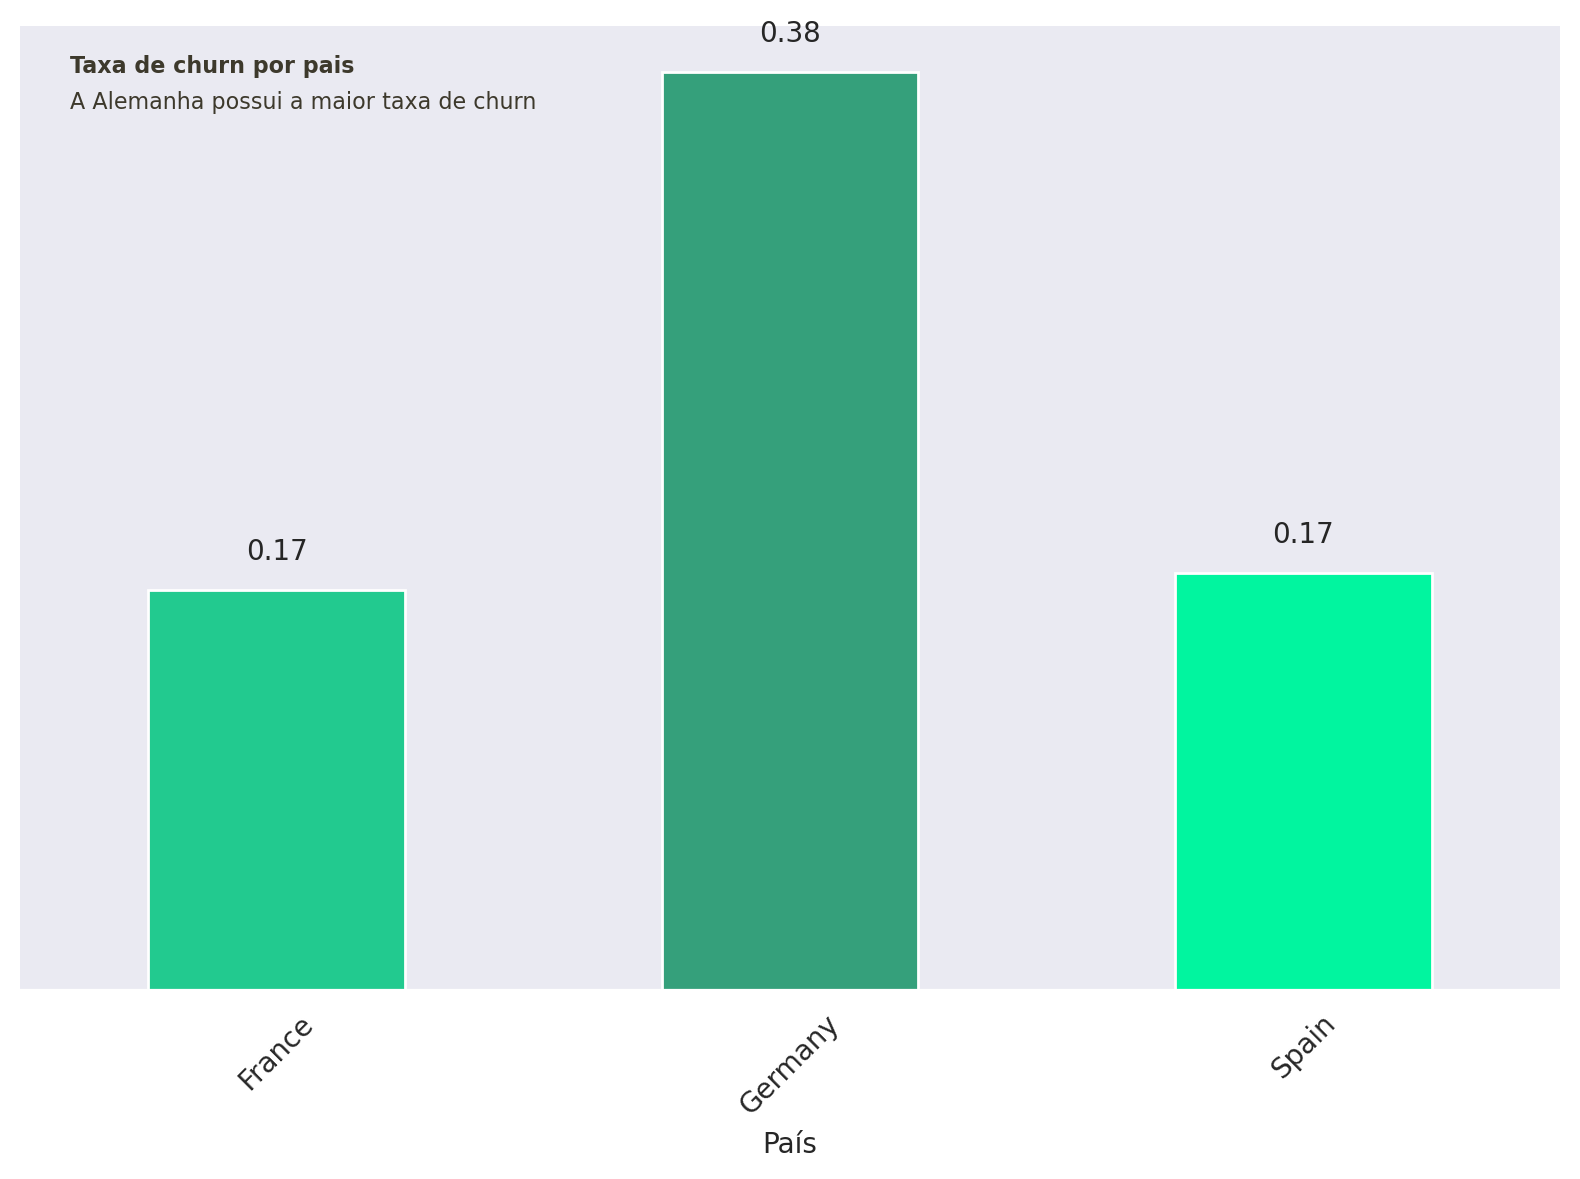

In [89]:
# Calcular a taxa de churn para cada país
churn_por_segmento = train_df.groupby('Geography')['Exited'].mean()

# Cores personalizadas
COR1 = '#22CA8F'
COR2 = '#35A07B'
COR3 = '#01F59F'
CORTEXT = '#3D392C'
cores = [COR1, COR2, COR3]

# Plotar o gráfico de barras da taxa de churn por segmento
plt.figure(figsize=(8, 6))
churn_por_segmento.plot(kind='bar', color=cores)

# Adicionar texto mostrando a taxa de churn ao lado de cada barra
for i, valor in enumerate(churn_por_segmento):
    plt.text(i, valor + 0.01, f'{valor:.2f}', ha='center', va='bottom')

# Remover as linhas de grade
plt.grid(False)

plt.xlabel('País')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.gca().spines['top'].set_visible(False)  # Remove a linha superior
plt.gca().spines['right'].set_visible(False)  # Remove a linha direita
plt.gca().spines['left'].set_visible(False)  # Remove a linha esquerda
plt.gca().spines['bottom'].set_visible(True)  # Mantém a linha inferior
plt.yticks([])
plt.figtext(0.05, 0.9, 'A Alemanha possui a maior taxa de churn', ha='left', fontsize=8, color=CORTEXT)
plt.figtext(0.05, 0.93, 'Taxa de churn por pais', ha='left', fontsize=8, color=CORTEXT, fontweight='bold')
plt.tight_layout()
plt.show()


### Taxa de churn por pais
e possivel observar que a alemanha e o pais com maior taxa de churn

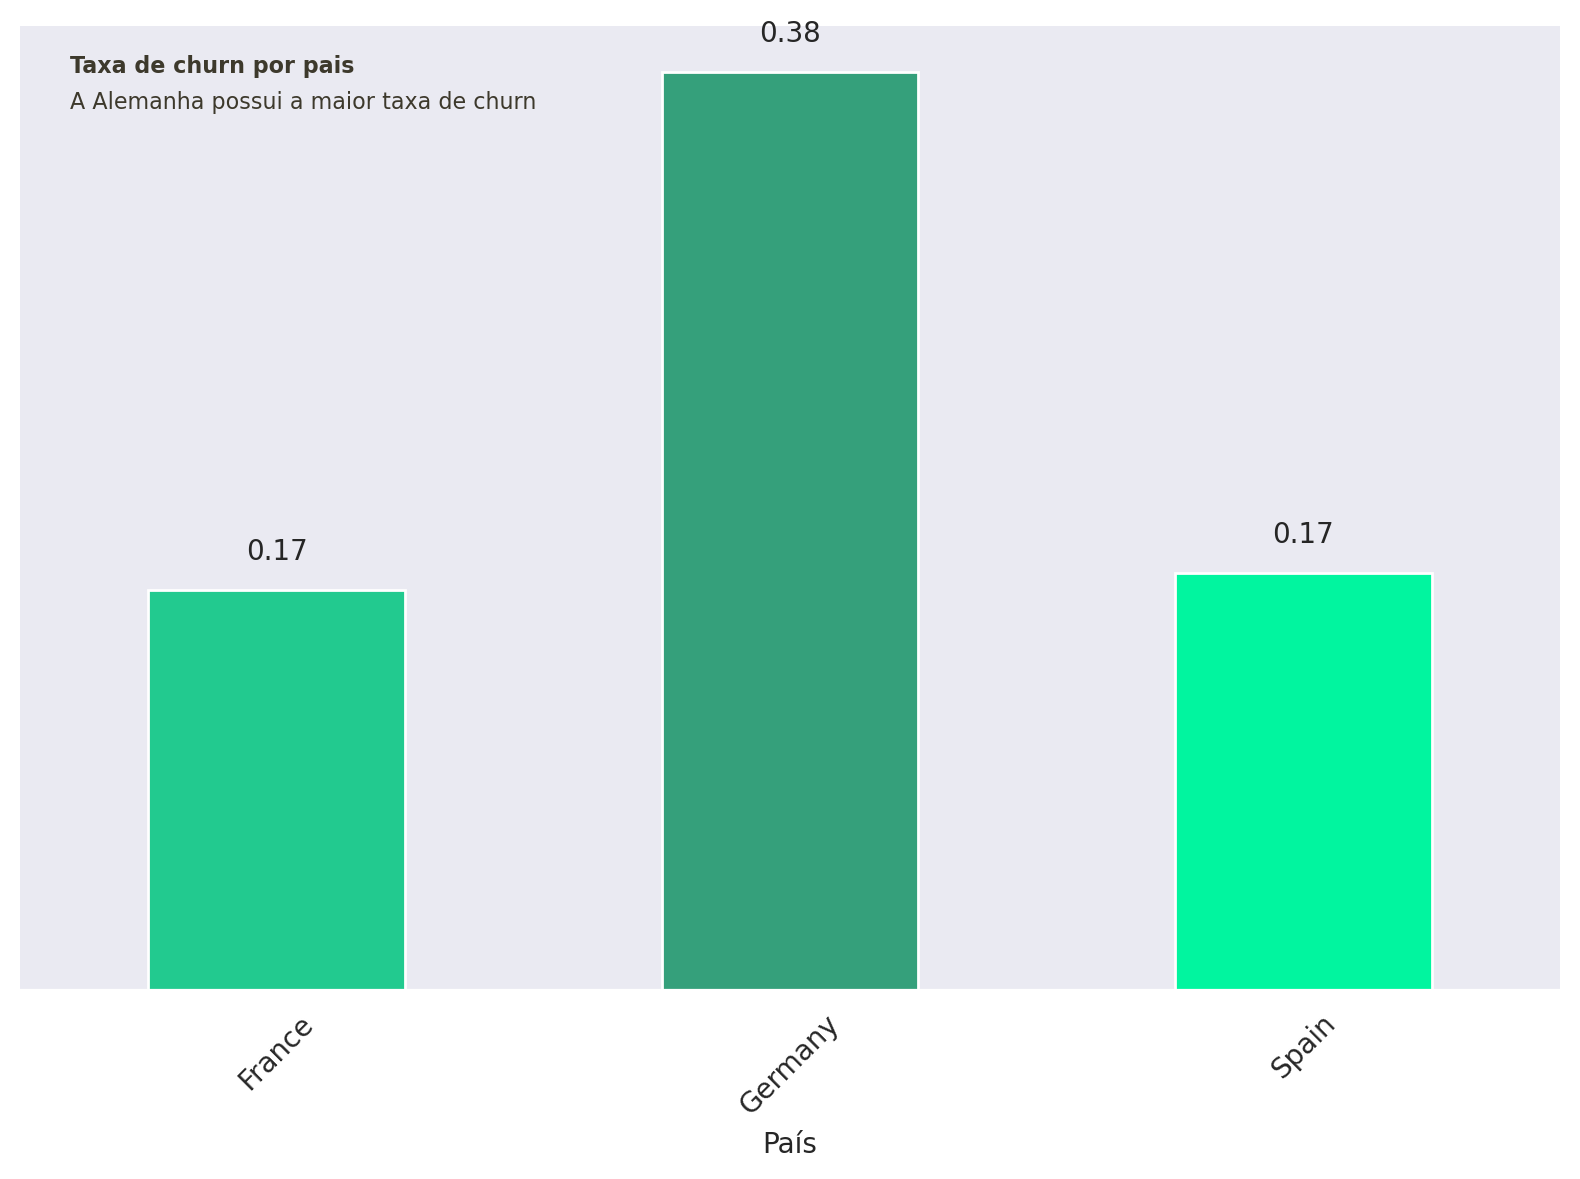

In [90]:
# Calcular a taxa de churn para cada país
churn_por_segmento = train_df.groupby('Geography')['Exited'].mean()

# Cores personalizadas
COR1 = '#22CA8F'
COR2 = '#35A07B'
COR3 = '#01F59F'
CORTEXT = '#3D392C'
cores = [COR1, COR2, COR3]

# Plotar o gráfico de barras da taxa de churn por segmento
plt.figure(figsize=(8, 6))
churn_por_segmento.plot(kind='bar', color=cores)

# Adicionar texto mostrando a taxa de churn ao lado de cada barra
for i, valor in enumerate(churn_por_segmento):
    plt.text(i, valor + 0.01, f'{valor:.2f}', ha='center', va='bottom')

# Remover as linhas de grade
plt.grid(False)

plt.xlabel('País')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.gca().spines['top'].set_visible(False)  # Remove a linha superior
plt.gca().spines['right'].set_visible(False)  # Remove a linha direita
plt.gca().spines['left'].set_visible(False)  # Remove a linha esquerda
plt.gca().spines['bottom'].set_visible(True)  # Mantém a linha inferior
plt.yticks([])
plt.figtext(0.05, 0.9, 'A Alemanha possui a maior taxa de churn', ha='left', fontsize=8, color=CORTEXT)
plt.figtext(0.05, 0.93, 'Taxa de churn por pais', ha='left', fontsize=8, color=CORTEXT, fontweight='bold')
plt.tight_layout()
plt.show()


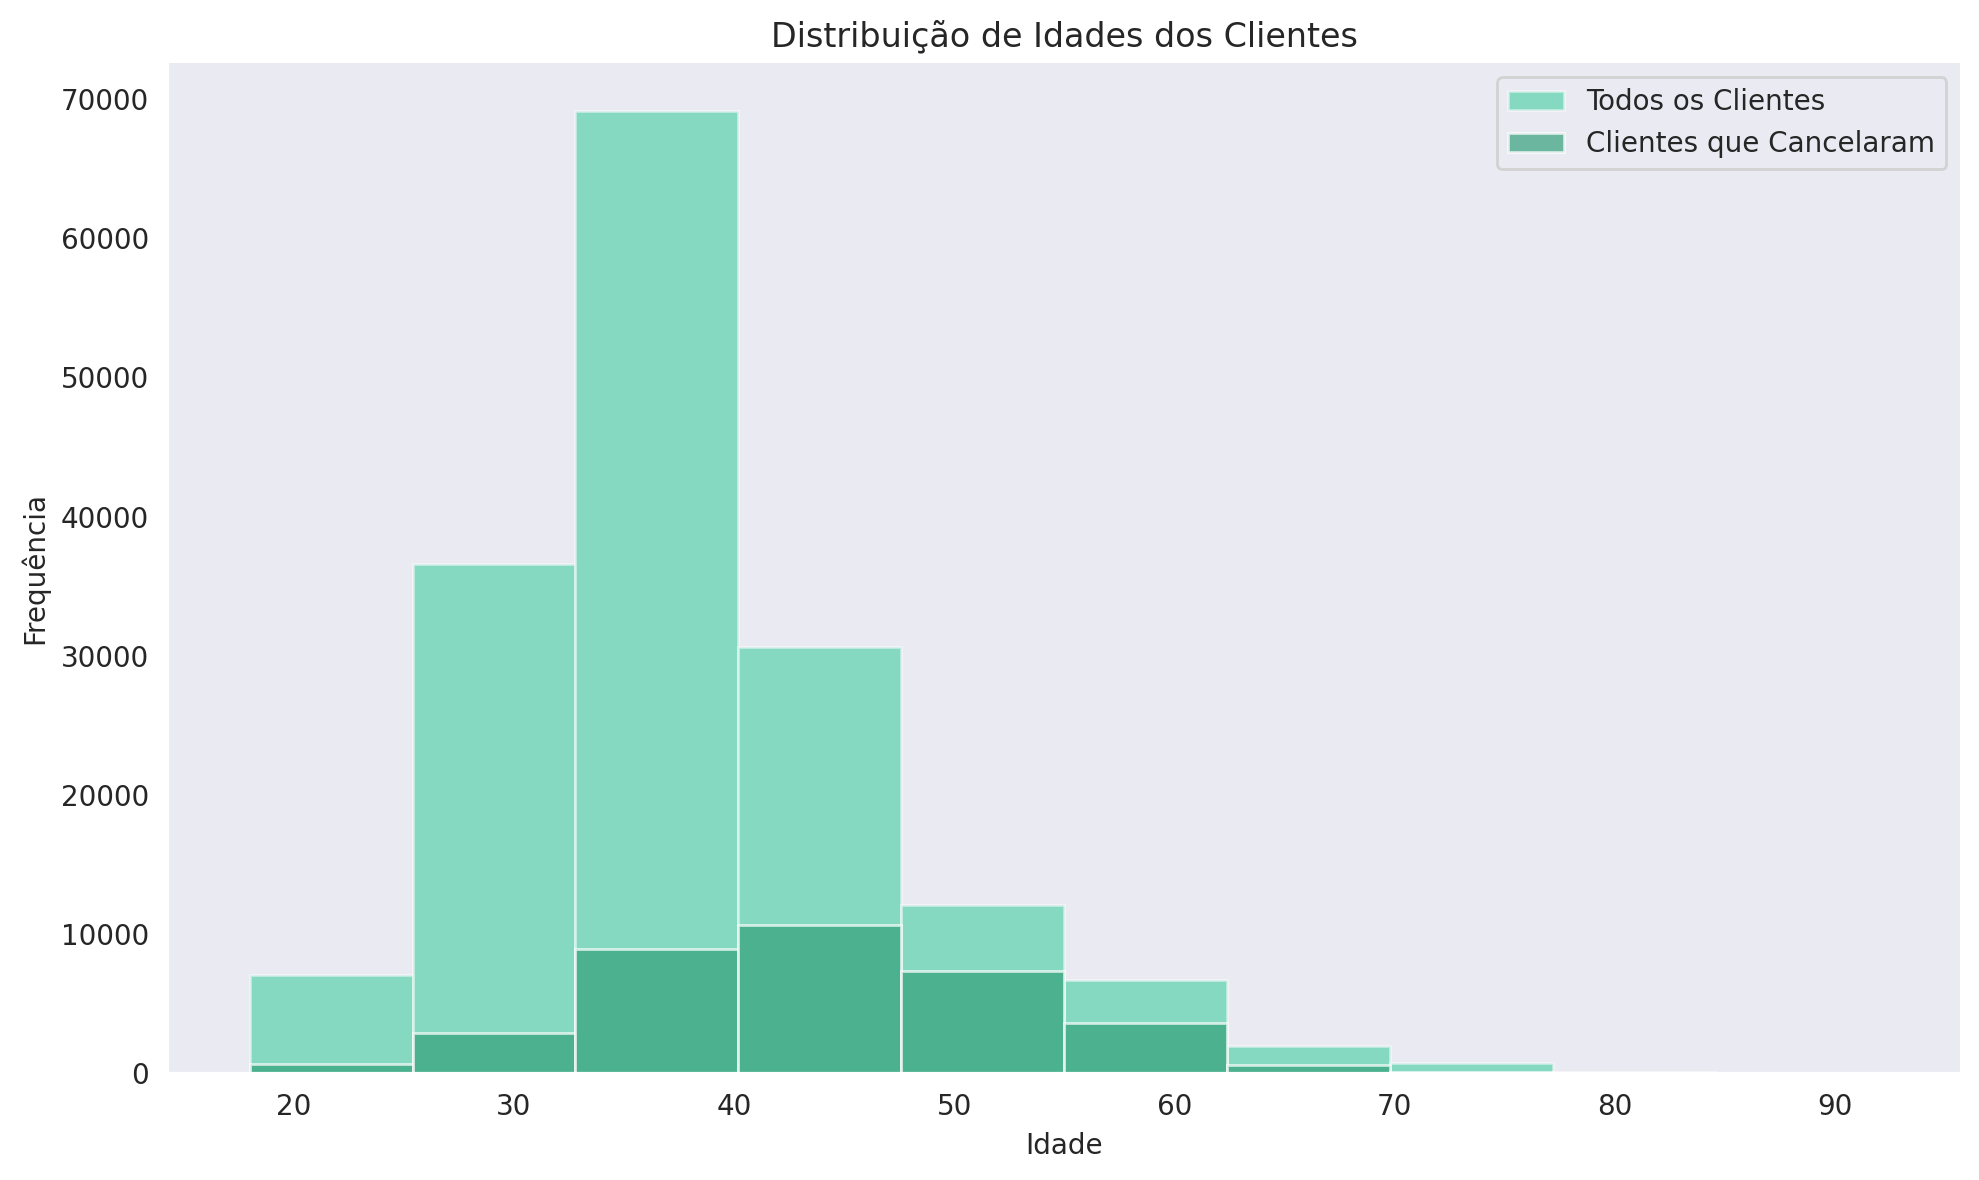

In [98]:
churned_customers = train_df[train_df['Exited'] == 1]


plt.figure(figsize=(10, 6))

# Plotar histogramas das idades dos clientes que cancelaram e dos que permaneceram ativos
plt.hist(train_df['Age'], bins=10, alpha=0.5, color=COR1, label='Todos os Clientes')
plt.hist(churned_customers['Age'], bins=10, alpha=0.7, color=COR2, label='Clientes que Cancelaram')

plt.title('Distribuição de Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

# Remover as linhas do top e do right
plt.gca().spines['top'].set_visible(False)  # Remove a linha superior
plt.gca().spines['right'].set_visible(False)  # Remove a linha direita

# Aumentar a resolução
plt.savefig('histograma_idades.png', dpi=300)
plt.grid(False)

plt.tight_layout()
plt.show()

In [92]:
data_unique = train_df.nunique()

col_num = data_unique[ data_unique > 12].index.tolist()
col_num.remove('Surname')
col_cat = data_unique[ data_unique <= 12].index.tolist()
col_num

['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [93]:
col_num.remove('id')
col_num.remove('CustomerId')
col_num.append('Tenure')

In [94]:
plt.rcParams['figure.dpi'] = 200

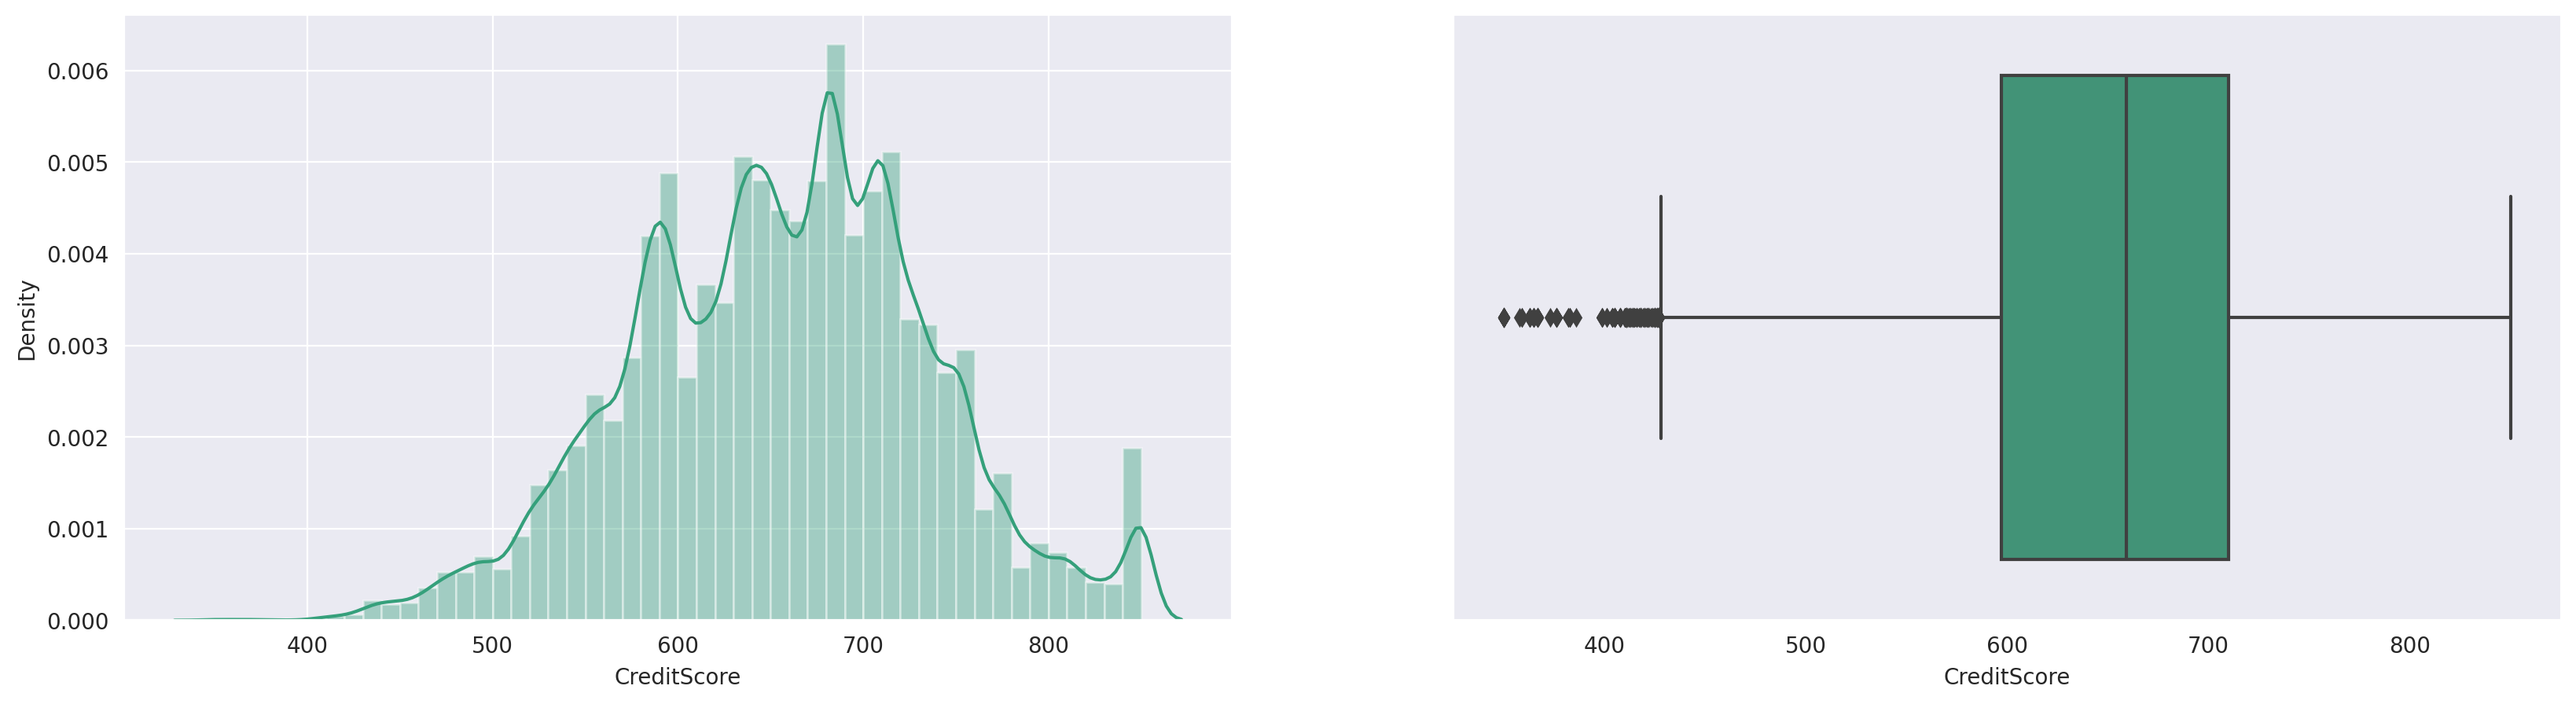

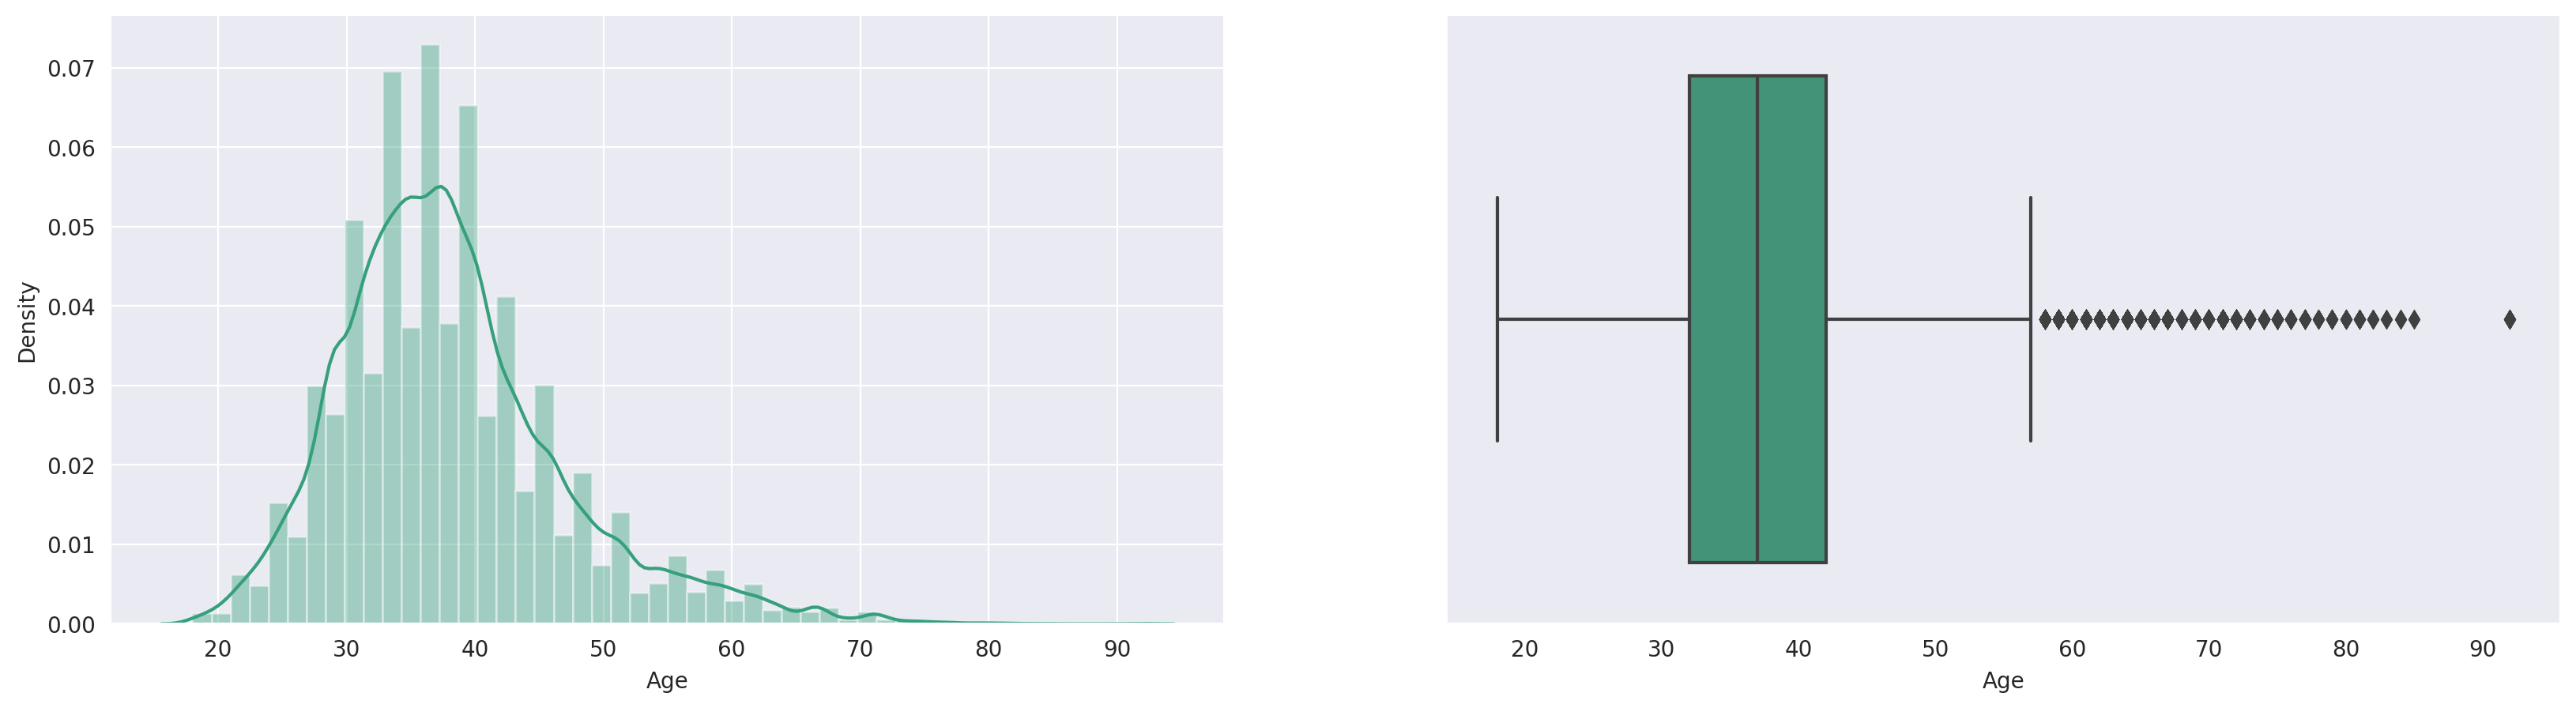

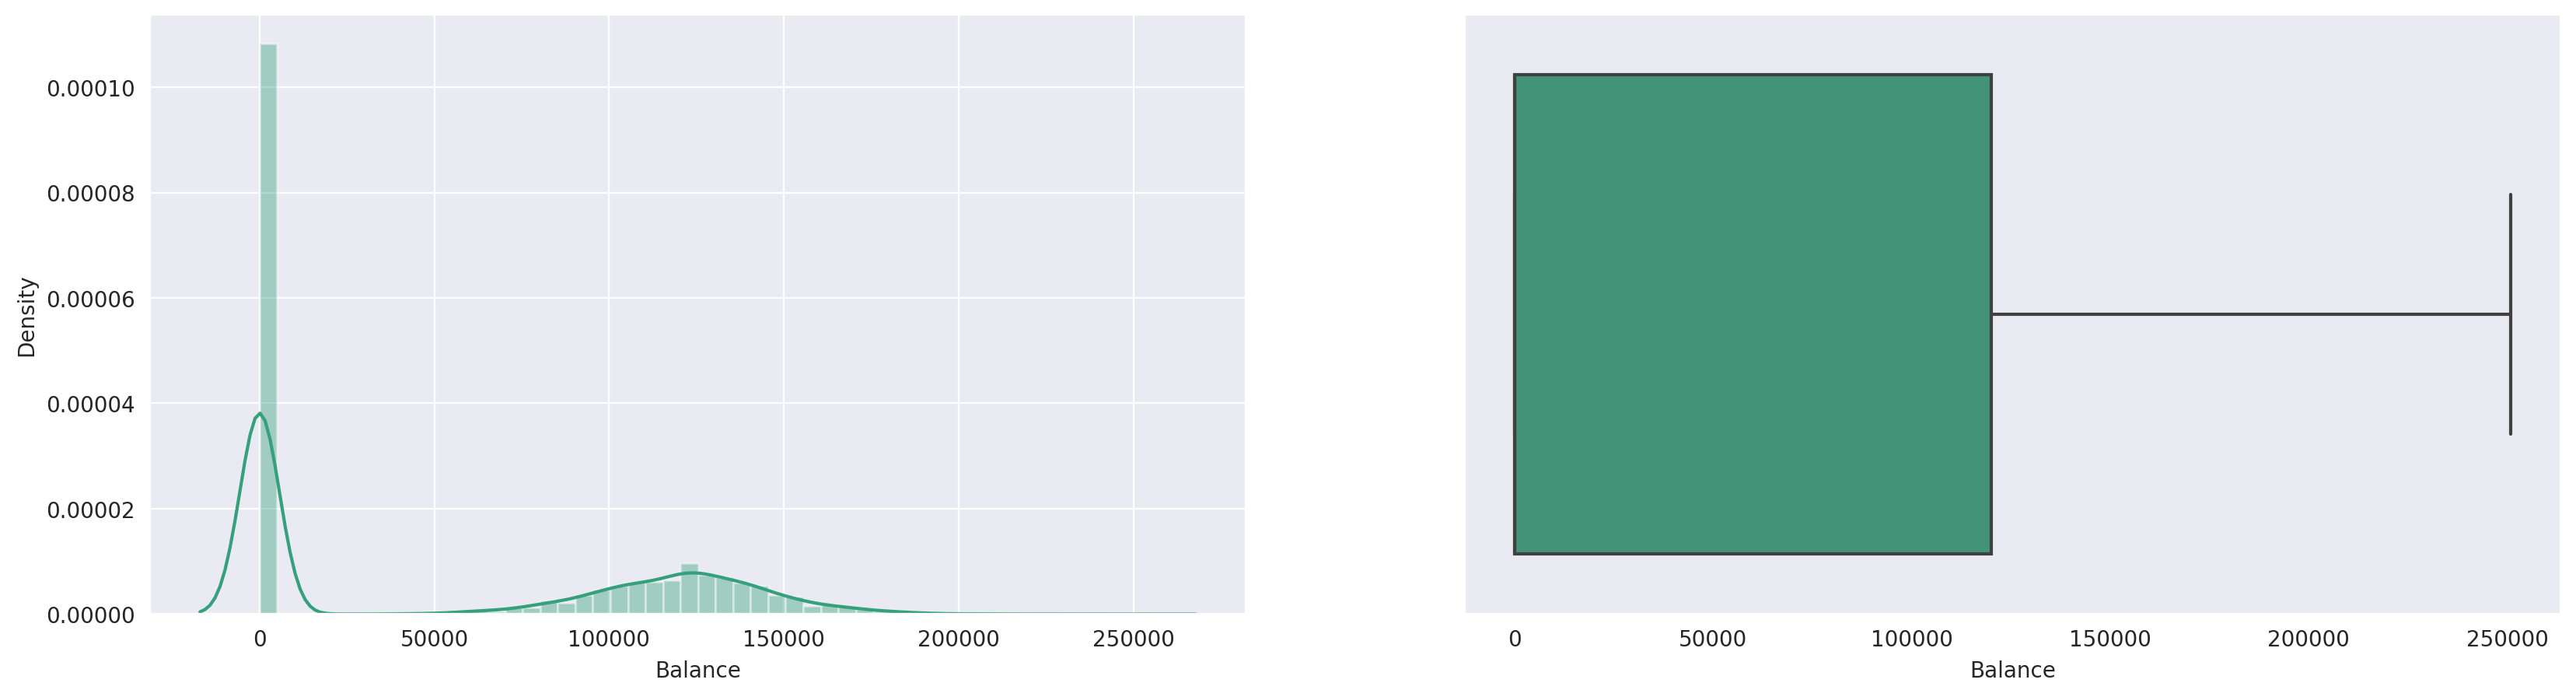

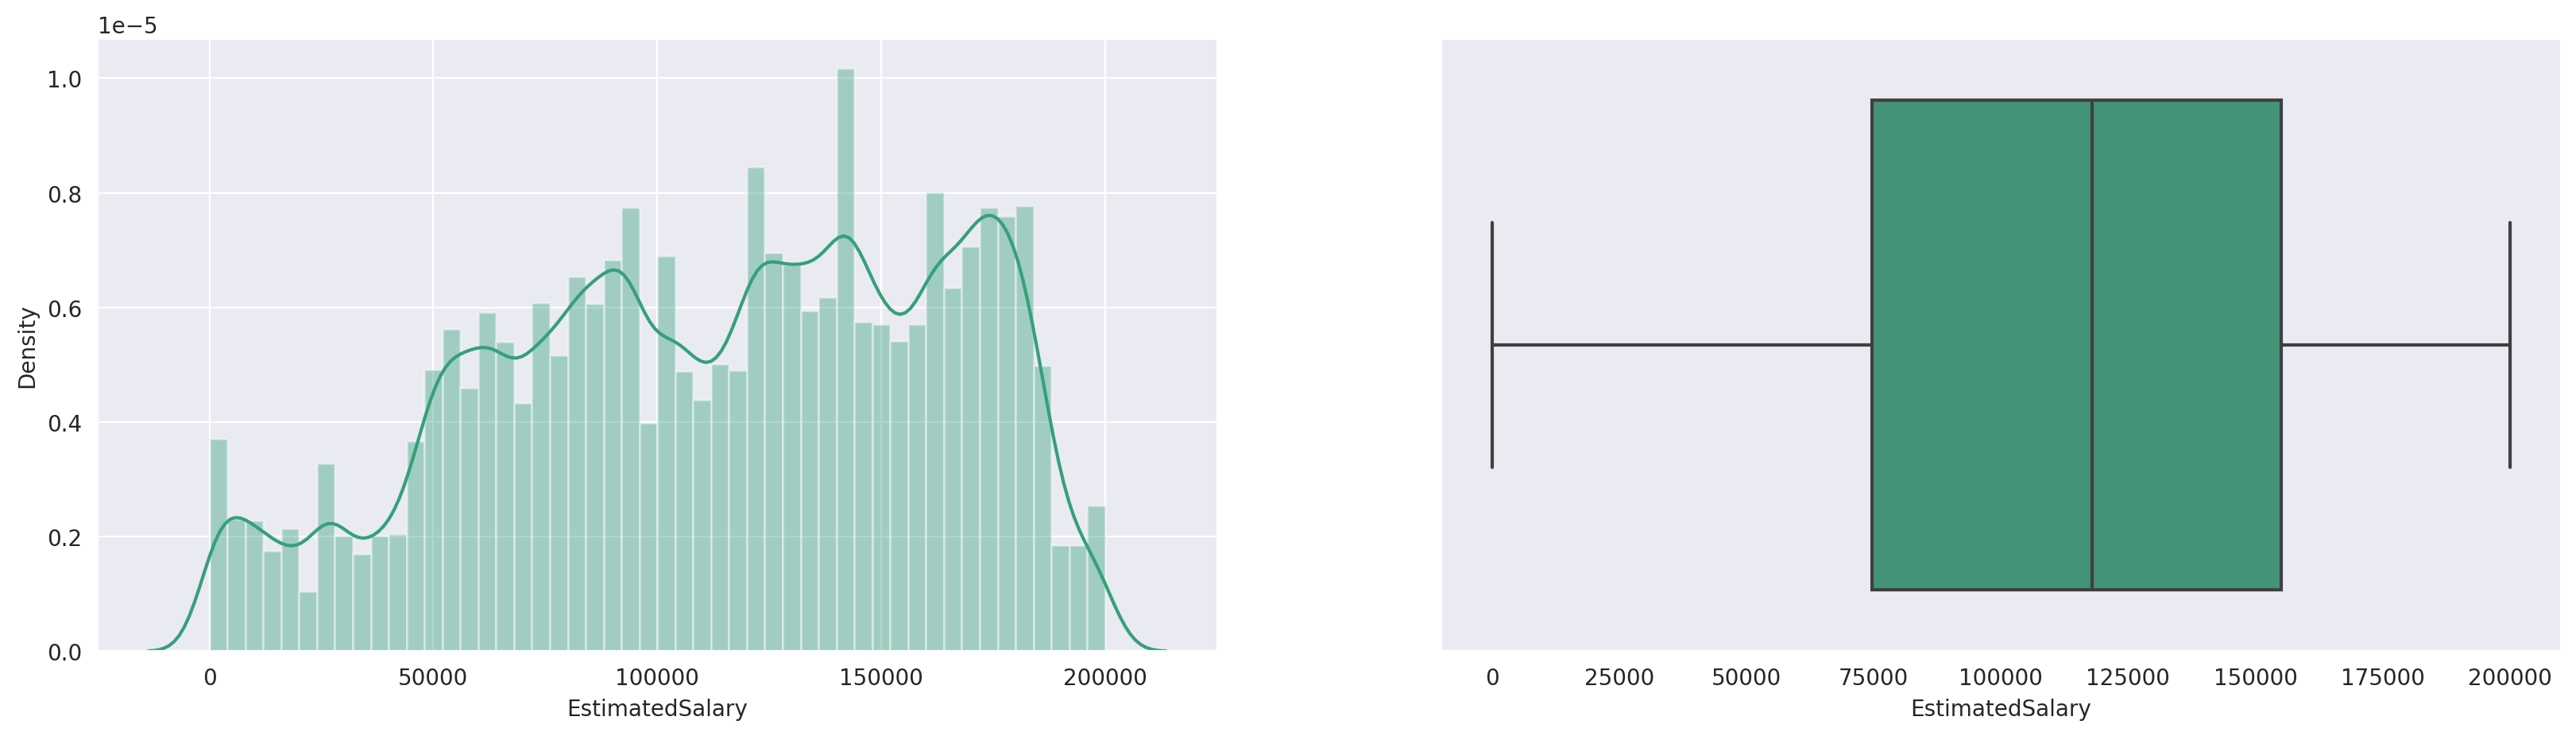

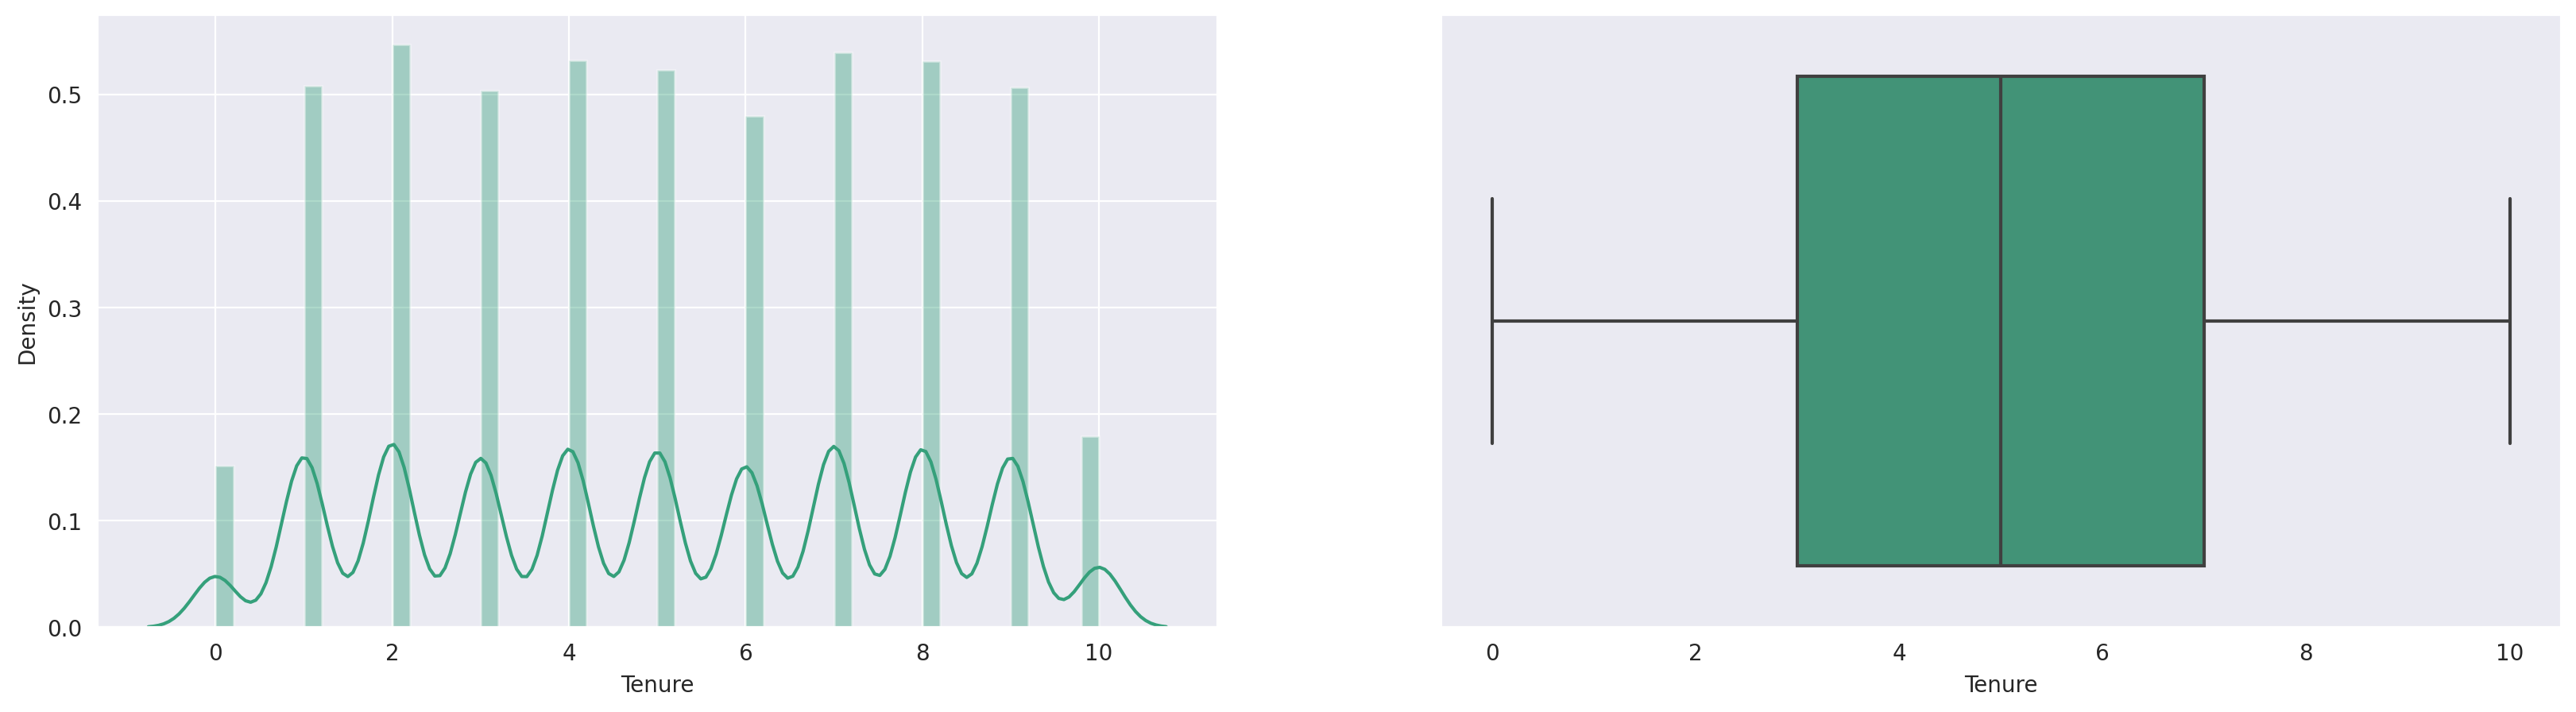

In [97]:
for col in col_num:
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  sns.distplot(train_df[col], ax=ax[0] , color=cores[1])  
  sns.boxplot(x=train_df[col], ax=ax[1] ,  palette=cores[1:])
  plt.grid(False)


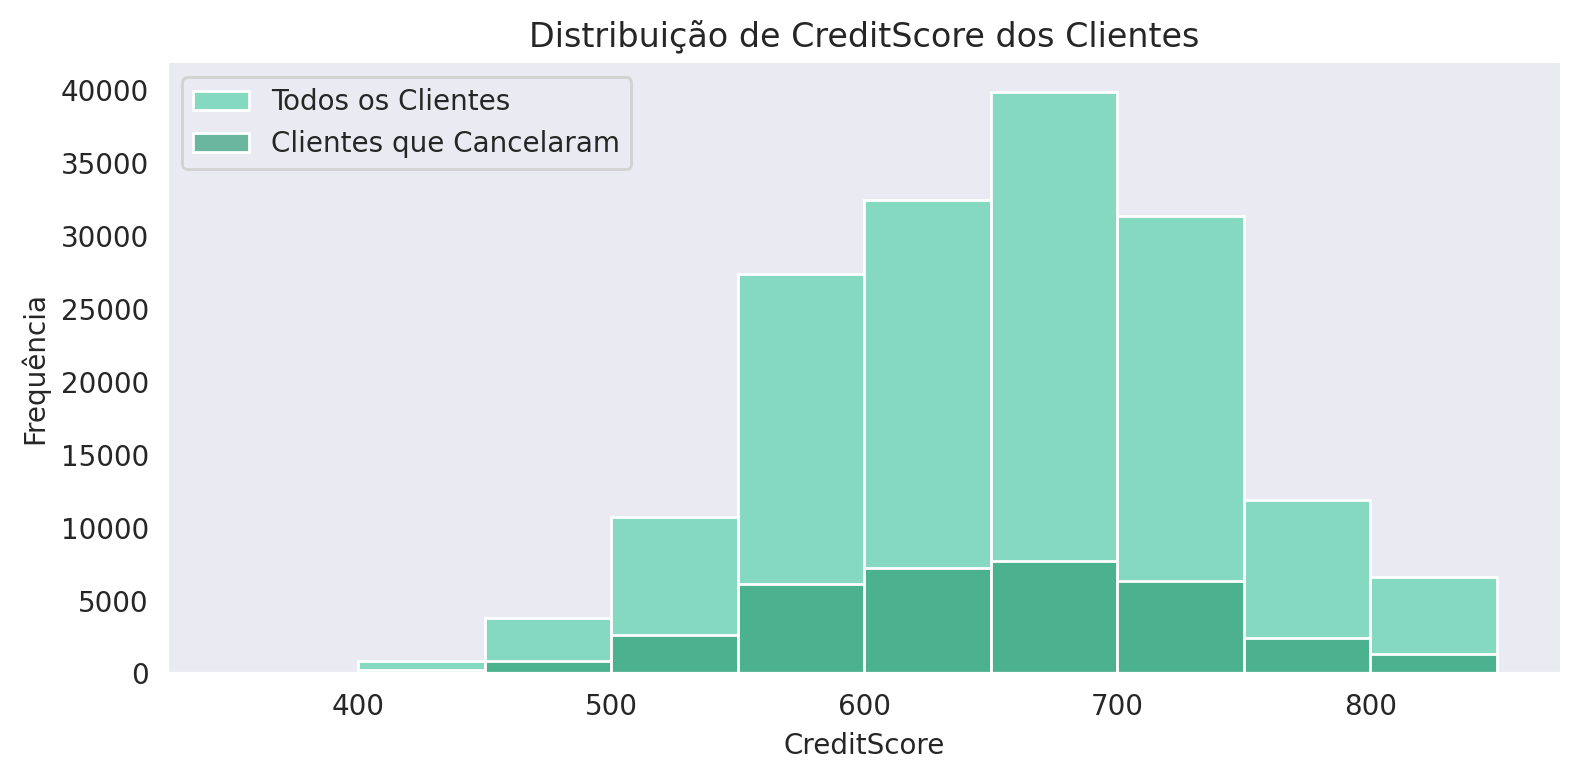

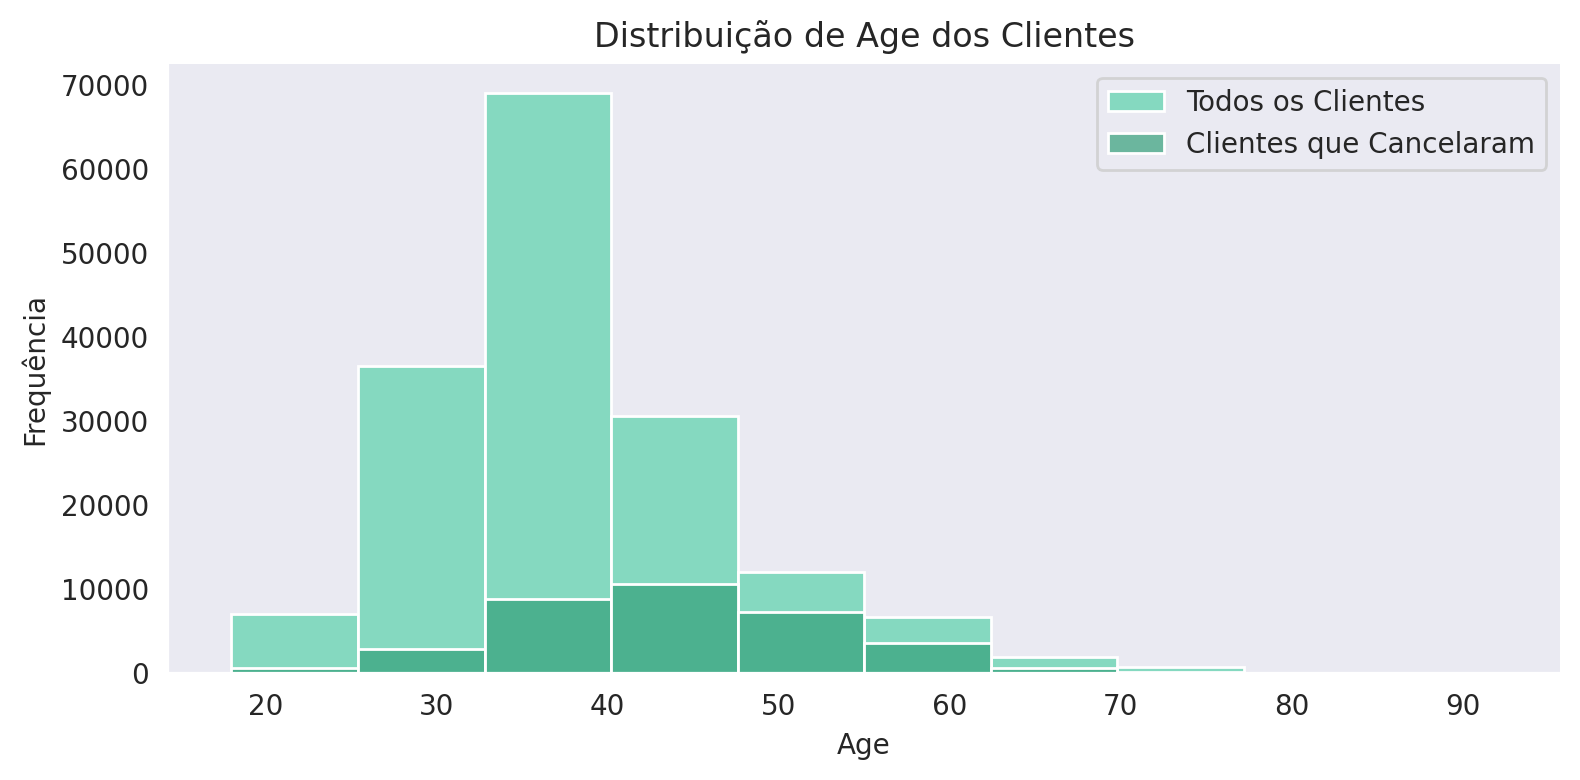

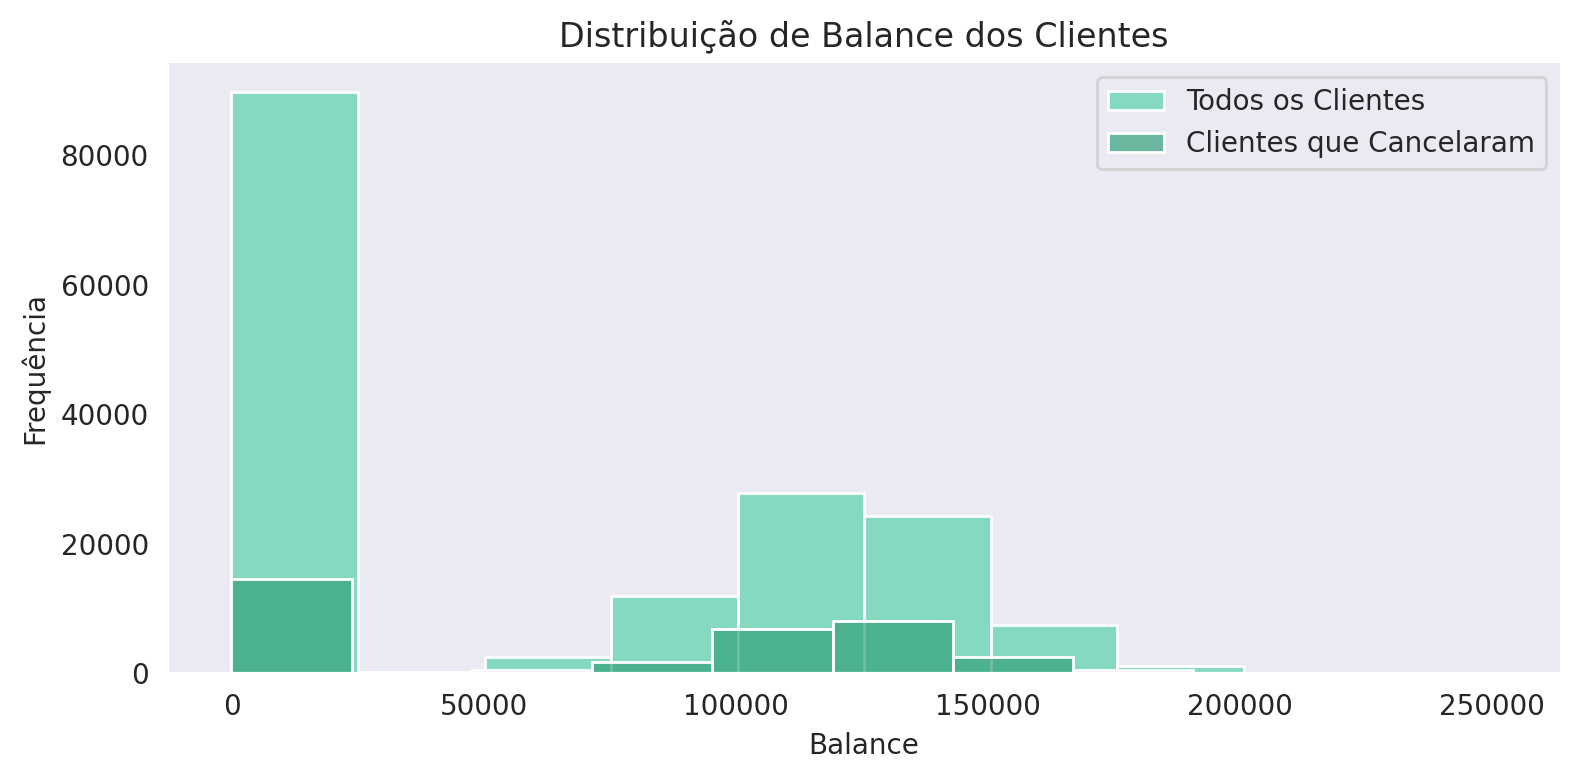

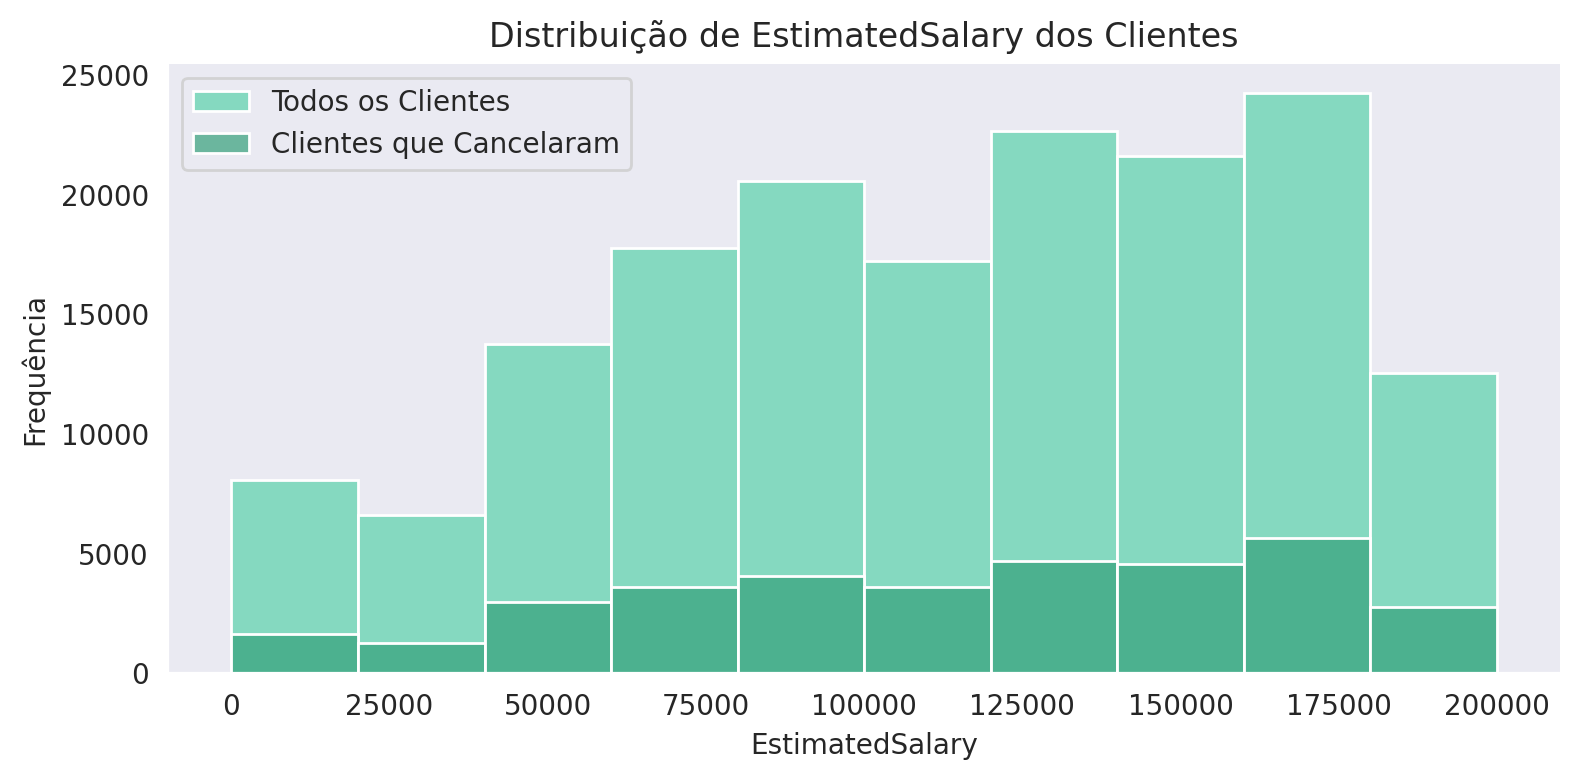

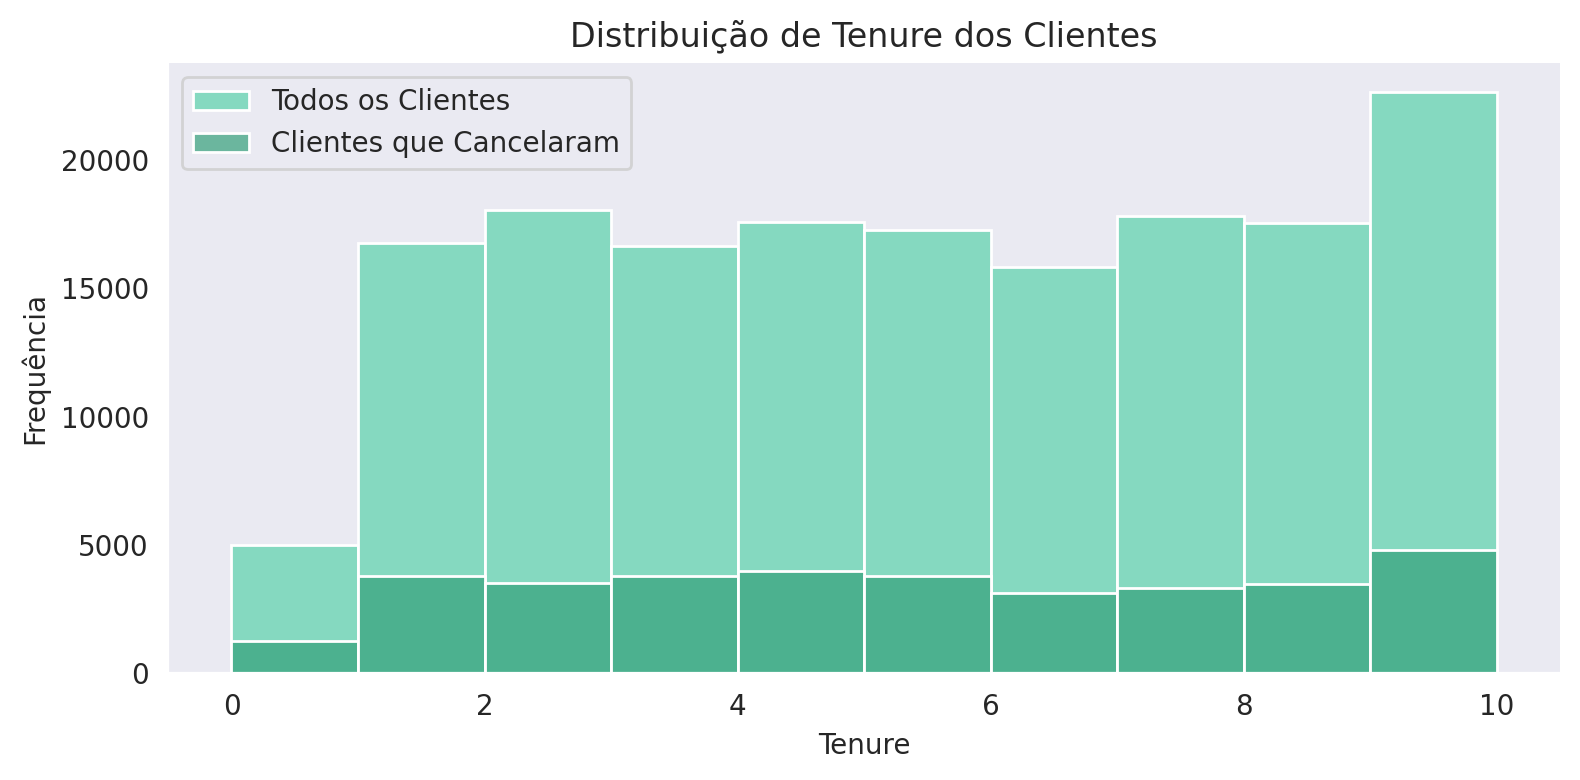

In [99]:


# Filtrar os clientes que cancelaram
churned_customers = train_df[train_df['Exited'] == 1]

# Definindo a resolução do gráfico
plt.rcParams['figure.dpi'] = 200

# Iterar sobre todas as colunas numéricas
for col in col_num:
    plt.figure(figsize=(8, 4))
    
    # Plotar histogramas das colunas para todos os clientes e para os clientes que cancelaram
    sns.histplot(train_df[col], bins=10, alpha=0.5, color=COR1, label='Todos os Clientes')
    sns.histplot(churned_customers[col], bins=10, alpha=0.7, color=COR2, label='Clientes que Cancelaram')
    
    plt.title('Distribuição de {} dos Clientes'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.legend()
    
    # Remover as linhas do top e do right
    plt.gca().spines['top'].set_visible(False)  # Remove a linha superior
    plt.gca().spines['right'].set_visible(False)  # Remove a linha direita
    
    # Ajustar layout para evitar sobreposição
    plt.tight_layout()
    
    # Salvar o gráfico como um arquivo de imagem
    plt.savefig('histograma_{}.png'.format(col), dpi=300)
    plt.grid(False)

    # Exibir o gráfico
    plt.show()
